In [44]:
from planning import utils
from shapely import geometry
from trajectory_generator.vehicle_model_node import (
    TrajectoryGenerator,
    Vehicle,
)


In [45]:
vm = TrajectoryGenerator(
                         model=Vehicle(5),
                         step=0.1,
                         r=0.8,
                         r_step=1.0,
        )


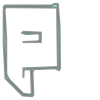

In [65]:
# no obstacle inflation
occ = utils.calculate_occupied_space('/home/basti/ros/driving_swarm_infrastructure/src/driving_swarm_bringup/maps/lndw2022.yaml', inflation=0)
occ

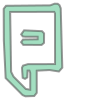

In [47]:
# with obstacle inflation
occ = utils.calculate_occupied_space('/home/basti/ros/driving_swarm_infrastructure/src/driving_swarm_bringup/maps/lndw2022.yaml')
occ

In [48]:
path = vm.tuples_to_path([(0.0, 0.0, 3.0), (1.0, 0.5, 3.1415)])
path

[(0.0, 0.0, 0),
 (0.03240881144614784, -0.12165702830965106, 0),
 (0.08250814440597769, -0.1766761226008788, 0),
 (0.14734495068030534, -0.17532569528530892, 0),
 (0.22396618206994645, -0.12787415877456698, 0),
 (0.3094187903757169, -0.04458992548027886, 0),
 (0.4007497273984324, 0.06425859218593007, 0),
 (0.4950059449389086, 0.18840298181243373, 0),
 (0.5892343947979616, 0.31757483098760675, 0),
 (0.6804820287764068, 0.44150572729982335, 0),
 (0.7657957986750601, 0.5499272583374577, 0),
 (0.8422226562947372, 0.6325710116888844, 0),
 (0.9068095534362542, 0.6791685749424778, 0),
 (0.9566034419004263, 0.6794515356866118, 0),
 (0.9886512734880697, 0.6231514815096612, 0),
 (1.0, 0.5, 0),
 (1.0, 0.5, 3.1415)]

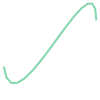

In [49]:
utils.path_2d(path)

In [50]:
occ.intersects(utils.path_2d(path))

False

In [51]:
occ.intersects(utils.path_2d(vm.tuples_to_path([(0.0,.0, .0), (10, 20, 0.0)])))

True

In [52]:
occ.intersects(geometry.Point(0.0, 0.0))

False

In [53]:
import networkx as nx

In [54]:
roadmap = nx.DiGraph()

In [55]:
roadmap.add_node((0.0, 0.0, 0.0))
roadmap.add_node((0.0, 1.0, 1.0))
roadmap.add_node((0.0, 1.5, 1.5))

In [56]:
path=vm.tuples_to_path([(0.0, 0.0, 0.0),(0.0, 1.0, 1.0)])
roadmap.add_edge((0.0, 0.0, 0.0), (0.0, 1.0, 1.0), path=path, cost=len(path))
path=vm.tuples_to_path([(0.0, 1.0, 1.0),(0.0, 1.5, 1.5)])
roadmap.add_edge((0.0, 1.0, 1.0), (0.0, 1.5, 1.5), path=path, cost=len(path))

In [57]:
s1 = nx.shortest_path(roadmap, (0.0, 0.0, 0.0), (0.0, 1.5, 1.5), weight="cost")
s1

[(0.0, 0.0, 0.0), (0.0, 1.0, 1.0), (0.0, 1.5, 1.5)]

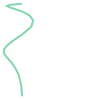

In [58]:
p1 = utils.path_2d(vm.tuples_to_path(s1))
p1

In [59]:
path=vm.tuples_to_path([(0.0, 0.0, 0.0),(0.0, 1.5, 1.5)])
roadmap.add_edge((0.0, 0.0, 0.0), (0.0, 1.5, 1.5), path=path, cost=len(path))
s2 = nx.shortest_path(roadmap, (0.0, 0.0, 0.0), (0.0, 1.5, 1.5), weight="cost")
s2

[(0.0, 0.0, 0.0), (0.0, 1.5, 1.5)]

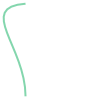

In [60]:
p2 = utils.path_2d(vm.tuples_to_path(s2))
p2

In [61]:
# plotting
import matplotlib.pyplot as plt
import shapely.ops as so
#from matplotlib.patches import Polygon
from descartes import PolygonPatch

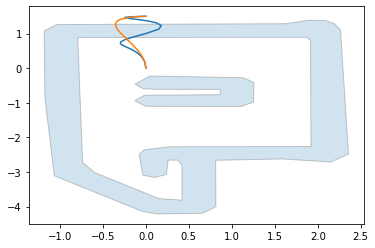

In [62]:
plt.figure()
for poly in so.cascaded_union(occ):
    ax = plt.gca()
    ax.add_patch(PolygonPatch(poly.buffer(0), alpha=0.2))
for path in [p1, p2]:
    plt.plot(*path.xy)
    
plt.show()

In [63]:
p1.intersects(occ)

True

In [64]:
p2.intersects(occ)

True